# DMRG
A set of simple DMRG examples using ITensor

In [1]:
using ITensors
using Plots
using LinearAlgebra

In [18]:
N = 40                    # Number of sites in chain
sites = 1:N               # List of site numbers
s = siteinds("S=1/2",N);  # Indices for sites for spin-1/2 system

Define DMRG parameters

In [3]:
nsweeps = 30 # Make sure to use lots of sweeps, especially for excited states
maxdim = [10,10,10,20,20,40,80,100,200,200]
cutoff = [1E-8]
noise = [1E-6];

## Transverse-field Ising model 
Setup physical system

In [4]:
h = 4.0;                  # Transverse field strength

Construct Hamiltonian MPO for transverse-field Ising model

In [5]:
ops = OpSum()
for j=1:N-1
    ops += -4,"Sz",j,"Sz",j+1
end
for j=1:N
    ops += -2*h,"Sx",j;
end
H = MPO(ops,s);

Compute the ground state ψ0

In [6]:
ψ0_init = randomMPS(s,linkdims=2)
energy0,ψ0 = dmrg(H,ψ0_init; nsweeps, maxdim, cutoff, noise);

After sweep 1 energy=-162.28942638035488  maxlinkdim=10 maxerr=1.84E-07 time=50.098
After sweep 2 energy=-162.446668923933  maxlinkdim=4 maxerr=9.40E-09 time=0.228
After sweep 3 energy=-162.44666957677242  maxlinkdim=3 maxerr=4.70E-09 time=0.205
After sweep 4 energy=-162.4466695767725  maxlinkdim=3 maxerr=4.70E-09 time=0.174
After sweep 5 energy=-162.44666957677282  maxlinkdim=3 maxerr=4.70E-09 time=0.209
After sweep 6 energy=-162.44666957677234  maxlinkdim=3 maxerr=4.70E-09 time=0.201
After sweep 7 energy=-162.44666957677245  maxlinkdim=3 maxerr=4.70E-09 time=0.134
After sweep 8 energy=-162.44666957677273  maxlinkdim=3 maxerr=4.70E-09 time=0.253
After sweep 9 energy=-162.4466695767721  maxlinkdim=3 maxerr=4.70E-09 time=0.243
After sweep 10 energy=-162.4466695767727  maxlinkdim=3 maxerr=4.70E-09 time=0.164
After sweep 11 energy=-162.44666957677214  maxlinkdim=3 maxerr=4.70E-09 time=0.175
After sweep 12 energy=-162.4466695767719  maxlinkdim=3 maxerr=4.70E-09 time=0.168
After sweep 13 en

Examine its x-magnetization profile

1     0.49606262207409474
2     0.4921717214718132
3     0.4920960640561223
4     0.49209373313447036
5     0.49209363554254393
6     0.4920936277506464
7     0.49209362376433136
8     0.49209361992103196
9     0.49209361607116114
10    0.4920936122090997
11    0.49209360833494653
12    0.49209360444903366
13    0.4920936005517066
14    0.4920935966433162
15    0.4920935927242145
16    0.49209358879475845
17    0.49209358485530796
18    0.49209358090622596
19    0.4920935769478785
20    0.49209357298063455
21    0.4920935690048661
22    0.49209356502094764
23    0.4920935610292569
24    0.49209355703017316
25    0.4920935530240786
26    0.492093549011358
27    0.4920935449923979
28    0.49209354096758656
29    0.4920935369373151
30    0.4920935329019757
31    0.4920935288619638
32    0.4920935248176936
33    0.49209352076997104
34    0.4920935167276835
35    0.49209351287026176
36    0.4920935130845611
37    0.49209360660104984
38    0.4920960646833918
39    0.49217151664872616
40    0

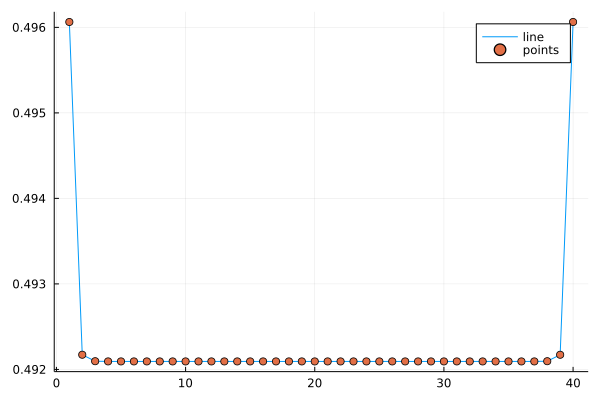

In [7]:
magx = expect(ψ0,"Sx");
for j in sites
    println(rpad(j,6," "),magx[j])
end
plot(sites, magx, label="line")  
scatter!(sites, magx, label="points") 

Compute the first excited state ψ1

In [8]:
weight = 20*h  # Use a large weight since gap is expected to be large
ψ1_init = randomMPS(s,linkdims=2)
energy1,ψ1 = dmrg(H,[ψ0],ψ1_init; nsweeps, maxdim, cutoff, noise, weight);

After sweep 1 energy=-155.49786355387536  maxlinkdim=10 maxerr=1.03E-07 time=0.827
After sweep 2 energy=-156.24733381246614  maxlinkdim=10 maxerr=6.00E-07 time=0.440
After sweep 3 energy=-156.32864558637564  maxlinkdim=10 maxerr=8.27E-08 time=0.166
After sweep 4 energy=-156.3570525117381  maxlinkdim=12 maxerr=9.62E-09 time=0.383
After sweep 5 energy=-156.3727697568248  maxlinkdim=11 maxerr=9.25E-09 time=0.182
After sweep 6 energy=-156.38549665768448  maxlinkdim=11 maxerr=9.82E-09 time=0.423
After sweep 7 energy=-156.40046563568725  maxlinkdim=11 maxerr=9.88E-09 time=0.180
After sweep 8 energy=-156.4111945651358  maxlinkdim=10 maxerr=9.28E-09 time=0.239
After sweep 9 energy=-156.418222876585  maxlinkdim=9 maxerr=9.02E-09 time=0.139
After sweep 10 energy=-156.42286271655198  maxlinkdim=8 maxerr=9.07E-09 time=0.182
After sweep 11 energy=-156.42605646458793  maxlinkdim=8 maxerr=9.66E-09 time=0.259
After sweep 12 energy=-156.42848811496015  maxlinkdim=8 maxerr=9.25E-09 time=0.160
After swee

Examines its magnetization profile

1     0.49583180372375996
2     0.4913668082557543
3     0.4903805249367929
4     0.48916725572842623
5     0.4876450620832383
6     0.4858310006280073
7     0.48374542284421435
8     0.4814045528149928
9     0.4788325203560593
10    0.4760462088139989
11    0.4730813167603834
12    0.46996032465866855
13    0.4667270342184224
14    0.46341826569573885
15    0.46006452368101475
16    0.45681684410151174
17    0.4536380730650841
18    0.45068775582121856
19    0.4480264518821293
20    0.445735104703894
21    0.44391280188821747
22    0.44262368049453715
23    0.441934233305736
24    0.4418980523529633
25    0.4425526663478163
26    0.443907796815846
27    0.445952152020908
28    0.44864345436343156
29    0.4519128822148274
30    0.4556758004255605
31    0.45984725461209386
32    0.46429450335270367
33    0.4688630447945699
34    0.4733920500847704
35    0.47771901688584845
36    0.48168996210108556
37    0.48516398038964903
38    0.48802219317127016
39    0.4902441135078915
40    0.4955

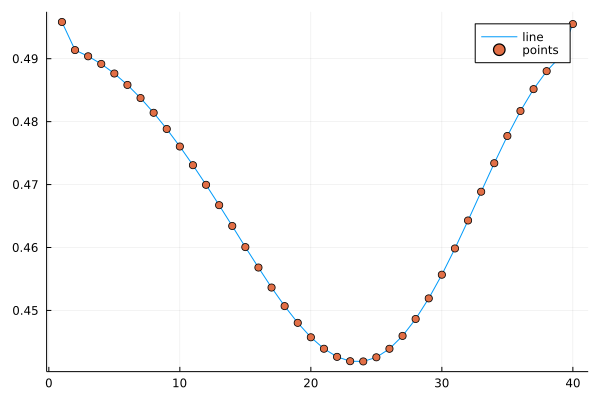

In [9]:
magx = expect(ψ1,"Sx");
for j in sites
    println(rpad(j,6," "),magx[j])
end
plot(sites, magx, label="line")  
scatter!(sites, magx, label="points") 

Check the ground state and first excited state are orthogonal

In [10]:
@show inner(ψ1,ψ0)

inner(ψ1, ψ0) = 2.8715173995928768e-8


2.8715173995928768e-8

The expected gap of the transverse-field Ising model is given by Eg = 2|h-1|

In [11]:
println("DMRG energy gap = ",energy1-energy0);  # (The DMRG gap will have finite-size corrections)
println("Theoretical gap = ",2*abs(h-1));

DMRG energy gap = 6.008030747764167
Theoretical gap = 6.0


## Isotropic Heisenberg model
Construct Hamiltonian MPO for the isotropic Heisenberg model

In [12]:
ops = OpSum()
for j=1:N-1
  ops += 0.5,"S+",j,"S-",j+1
  ops += 0.5,"S-",j,"S+",j+1
  ops += "Sz",j,"Sz",j+1
end
H = MPO(ops,s);

Compute the ground state ψ0

In [13]:
ψ0_init = randomMPS(s,linkdims=2)
energy0,ψ0 = dmrg(H,ψ0_init; nsweeps, maxdim, cutoff, noise);

After sweep 1 energy=-17.502604254091572  maxlinkdim=10 maxerr=1.14E-05 time=0.140
After sweep 2 energy=-17.539143421245786  maxlinkdim=10 maxerr=2.20E-05 time=0.250
After sweep 3 energy=-17.539679399245145  maxlinkdim=10 maxerr=3.08E-05 time=0.183
After sweep 4 energy=-17.541451810627223  maxlinkdim=20 maxerr=3.87E-07 time=1.005
After sweep 5 energy=-17.541452125022104  maxlinkdim=20 maxerr=4.17E-07 time=0.800
After sweep 6 energy=-17.5414723134193  maxlinkdim=38 maxerr=1.00E-08 time=0.951
After sweep 7 energy=-17.541472321460017  maxlinkdim=38 maxerr=1.00E-08 time=1.342
After sweep 8 energy=-17.541472321503633  maxlinkdim=38 maxerr=1.00E-08 time=0.955
After sweep 9 energy=-17.54147232103846  maxlinkdim=38 maxerr=1.00E-08 time=0.908
After sweep 10 energy=-17.541472320366815  maxlinkdim=38 maxerr=1.00E-08 time=1.437
After sweep 11 energy=-17.5414723201547  maxlinkdim=38 maxerr=1.00E-08 time=1.054
After sweep 12 energy=-17.541472320073037  maxlinkdim=38 maxerr=1.00E-08 time=0.919
After 

This gives a ground state energy density 

In [14]:
energy0/N

-0.43853680803932865

Compare to the Bethe ansatz result in the thermodynamic limit

In [15]:
1/4-log(2)

-0.4431471805599453

Compute the z-z correlations

In [16]:
zzcorr = correlation_matrix(ψ0,"Sz","Sz");

Plot them from the centre of the system outwards

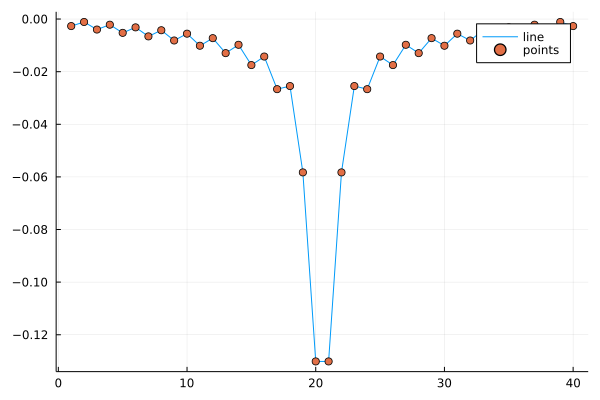

In [17]:
zzcen = diag(reverse(zzcorr, dims = 2));
plot(sites, zzcen, label="line")  
scatter!(sites, zzcen, label="points") 